In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_excel('Kompetitorv1.xlsx', 'PTO', usecols=['No', 'Sum_Of_Net_Weight_Kg'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   No                    429 non-null    datetime64[ns]
 1   Sum_Of_Net_Weight_Kg  429 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [4]:
df['Sale_LastMonth']=df['Sum_Of_Net_Weight_Kg'].shift(+1)
df['Sale_2Monthsback']=df['Sum_Of_Net_Weight_Kg'].shift(+2)
df['Sale_3Monthsback']=df['Sum_Of_Net_Weight_Kg'].shift(+3)
df

,No,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
0,2021-01-04 08:00:00,2000.0,NaN,NaN,NaN
1,2021-01-05 08:00:00,600.0,2000.0,NaN,NaN
2,2021-01-05 08:00:00,2400.0,600.0,2000.0,NaN
3,2021-01-06 08:00:00,1581.5,2400.0,600.0,2000.0
4,2021-01-07 08:00:00,10000.0,1581.5,2400.0,600.0
...,...,...,...,...,...
424,2021-08-13 08:00:00,200.0,1560.0,2000.0,1000.0
425,2021-08-13 08:00:00,1990.0,200.0,1560.0,2000.0
426,2021-08-13 08:00:00,210.0,1990.0,200.0,1560.0
427,2021-08-19 08:00:00,1329.0,210.0,1990.0,200.0


In [5]:
df=df.dropna()
df

,No,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
3,2021-01-06 08:00:00,1581.5,2400.0,600.0,2000.0
4,2021-01-07 08:00:00,10000.0,1581.5,2400.0,600.0
5,2021-01-07 08:00:00,1000.0,10000.0,1581.5,2400.0
6,2021-01-07 08:00:00,2000.0,1000.0,10000.0,1581.5
7,2021-01-08 08:00:00,2340.0,2000.0,1000.0,10000.0
...,...,...,...,...,...
424,2021-08-13 08:00:00,200.0,1560.0,2000.0,1000.0
425,2021-08-13 08:00:00,1990.0,200.0,1560.0,2000.0
426,2021-08-13 08:00:00,210.0,1990.0,200.0,1560.0
427,2021-08-19 08:00:00,1329.0,210.0,1990.0,200.0


In [6]:
df.describe()

,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
count,426.000000,426.000000,426.000000,426.000000
mean,2793.925469,2792.517019,2790.805751,2795.007629
std,3259.800987,3259.841359,3260.802650,3258.621763
min,50.000000,50.000000,50.000000,50.000000
25%,600.000000,600.000000,600.000000,600.000000
50%,1800.000000,1800.000000,1800.000000,1800.000000
75%,3600.000000,3600.000000,3600.000000,3600.000000
max,16000.000000,16000.000000,16000.000000,16000.000000


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sum_Of_Net_Weight_Kg']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 2400.    600.   2000. ]
 [ 1581.5  2400.    600. ]
 [10000.   1581.5  2400. ]
 ...
 [ 1990.    200.   1560. ]
 [  210.   1990.    200. ]
 [ 1329.    210.   1990. ]]


In [10]:
X_train,X_test,y_train,y_test=final_x[:-120],final_x[-120:],y[:-120],y[-120:]

In [11]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

E:\Users\BAGJA\AppData\Local\Temp\ipykernel_5128\1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

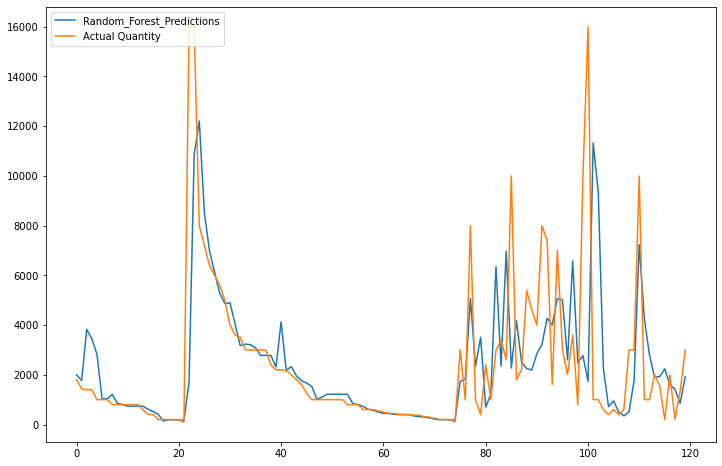

[ 1997.66147242  1769.83638584  3830.33333333  3445.2
  2827.2         1034.93333333  1031.3         1216.40285907
   843.71166667   805.74         736.5025       736.5025
   736.5025       736.5025       613.42166667   513.28583333
   407.64325758   135.50714286   194.94333333   184.80805195
   184.80805195   164.39333333  1695.52       10853.
 12211.27619048  8517.66666667  6982.          6120.
  5274.          4864.          4896.66666667  4045.
  3171.15        3232.81        3210.05        3084.
  2779.46786325  2779.46786325  2779.46786325  2317.06666667
  4131.8         2177.65        2332.01515152  1953.16634199
  1759.63690476  1664.91111111  1530.4         1014.06666667
  1095.64666667  1216.40285907  1216.40285907  1216.40285907
  1216.40285907  1216.40285907   843.71166667   805.74
   736.5025       613.42166667   572.78095238   499.79928571
   450.43261905   446.20678571   408.2925       403.6625
   399.2          396.77575758   341.43354978   317.49347944
   293.77443182 

285458.51712082035

In [12]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Quantity') 
plt.legend(loc="upper left")
plt.show()
print(pred)
pred.sum()

In [18]:
285458*0.0145

4139.1410000000005

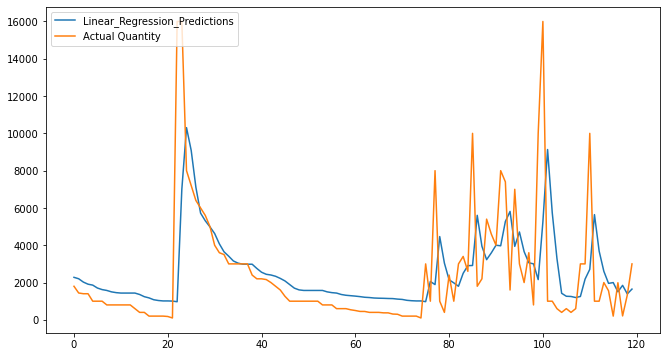

[[ 2279.31733384]
 [ 2203.32732837]
 [ 2024.76213621]
 [ 1911.51146313]
 [ 1862.03752776]
 [ 1705.48892805]
 [ 1621.92256344]
 [ 1576.23667576]
 [ 1500.24667029]
 [ 1458.46348799]
 [ 1435.62054415]
 [ 1435.62054415]
 [ 1435.62054415]
 [ 1435.62054415]
 [ 1359.63053867]
 [ 1241.8573509 ]
 [ 1177.23122476]
 [ 1078.39827544]
 [ 1036.61509314]
 [ 1013.7721493 ]
 [ 1013.7721493 ]
 [ 1006.17314876]
 [  971.59882834]
 [ 6993.80669628]
 [10306.43251177]
 [ 9082.84632792]
 [ 7107.55901393]
 [ 5722.74850929]
 [ 5312.26399378]
 [ 4985.34584287]
 [ 4628.12357417]
 [ 4077.13811221]
 [ 3647.71335824]
 [ 3411.9372717 ]
 [ 3155.38477919]
 [ 3039.50535151]
 [ 2982.39799192]
 [ 2982.39799192]
 [ 2982.39799192]
 [ 2754.42797549]
 [ 2553.08842311]
 [ 2442.77640929]
 [ 2404.73546436]
 [ 2335.58682352]
 [ 2221.60168344]
 [ 2085.55414059]
 [ 1891.74500514]
 [ 1699.08364427]
 [ 1605.93250275]
 [ 1576.23667576]
 [ 1576.23667576]
 [ 1576.23667576]
 [ 1576.23667576]
 [ 1576.23667576]
 [ 1500.24667029]
 [ 1458.46

309043.4592385924

In [25]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()
print(lin_pred)
lin_pred.sum()

In [23]:
(309043-2762)*0.0145

4441.074500000001

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [17]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 2799.3101812234804
Mean Squared Error for Linear Regression Model is: 2762.543890299774
